# Results Summary

This notebook aggregates metrics from `outputs/**/metrics.json` and visualizes them. Run it after executing several experiments.

In [4]:
# Results loader: finds metrics whether you launched Jupyter from the repo root or from notebooks/
import json, subprocess
from pathlib import Path
import pandas as pd

# Search both current dir and parent (project root)
search_roots = [Path("."), Path("..")]
metric_files = []
for base in search_roots:
    metrics_dir = base / "outputs"
    if metrics_dir.exists():
        metric_files += list(metrics_dir.rglob("metrics.json"))

if not metric_files:
    # Helpful message + (optional) auto-generate 2 demo runs
    print("No metrics found under outputs/**/metrics.json.")
    print("Run a few experiments, e.g.:")
    print("  python scripts/run_experiment.py --dataset iris --embed pca --cluster kmeans --n-clusters 3 --outdir outputs/iris_pca_kmeans")
    print("  python scripts/run_experiment.py --dataset digits --embed umap --cluster gmm --n-clusters 10 --outdir outputs/digits_umap_gmm")

    # Optional: uncomment to auto-run two quick demos for reviewers
    # subprocess.run(["python", "scripts/run_experiment.py", "--dataset", "iris", "--embed", "pca",
    #                 "--cluster", "kmeans", "--n-clusters", "3", "--outdir", "outputs/iris_pca_kmeans"], check=True)
    # subprocess.run(["python", "scripts/run_experiment.py", "--dataset", "digits", "--embed", "umap",
    #                 "--cluster", "gmm", "--n-clusters", "10", "--outdir", "outputs/digits_umap_gmm"], check=True)
    # Re-run the search
    # metric_files = list((Path(".") / "outputs").rglob("metrics.json")) + list((Path("..") / "outputs").rglob("metrics.json"))

rows = []
for p in metric_files:
    tag = p.parent.name
    with open(p) as f:
        m = json.load(f)
    rows.append({"experiment": tag, **m})

if rows:
    df = (pd.DataFrame(rows)
            .sort_values(by="silhouette", ascending=False)
            .reset_index(drop=True))
else:
    df = pd.DataFrame()  # empty placeholder

df


,experiment,silhouette,calinski_harabasz,davies_bouldin,ari,nmi,homogeneity,completeness,v_measure
0,digits_umap_gmm,0.804686,28247.357422,0.259339,0.827838,0.884182,0.876963,0.891520,0.884182
1,digits_umap_kmeans,0.786122,17816.939453,0.274028,0.816979,0.896452,0.877404,0.916347,0.896452
2,wine_umap_kmeans,0.777237,1269.302490,0.325977,0.362656,0.432715,0.431743,0.433692,0.432715
3,wine_umap_gmm,0.728908,1362.252930,0.386186,0.362656,0.432715,0.431743,0.433692,0.432715
4,iris_umap_gmm,0.722283,1481.017334,0.405930,0.745504,0.797989,0.786923,0.809369,0.797989
5,digits_umap_dbscan,0.708218,11223.094727,0.321823,0.708987,0.854787,0.823847,0.888141,0.854787
6,iris_umap_kmeans,0.693675,1729.795776,0.414717,0.759199,0.805694,0.795982,0.815646,0.805694
7,iris_pca_kmeans,0.597676,693.708433,0.564816,0.716342,0.741912,0.736419,0.747487,0.741912
8,wine_pca_kmeans,0.572255,562.518752,0.532969,0.371114,0.428757,0.428812,0.428701,0.428757
9,iris_pca_gmm,0.531308,563.922798,0.672119,0.941045,0.930551,0.930042,0.931060,0.930551


<Figure size 640x480 with 0 Axes>

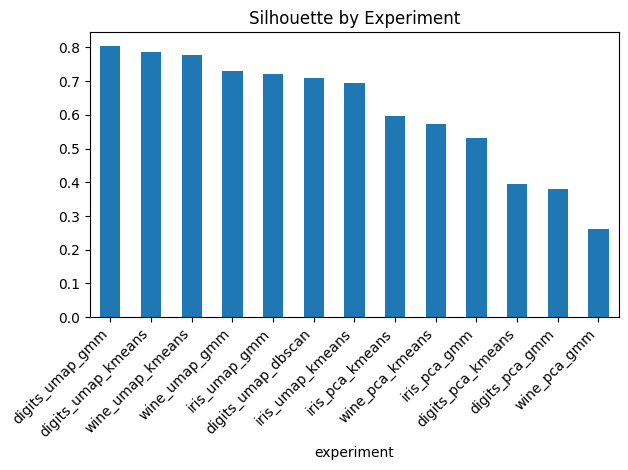

In [5]:
import matplotlib.pyplot as plt

# Bar chart: silhouette by experiment
plt.figure()
df.plot(kind='bar', x='experiment', y='silhouette', legend=False)
plt.title('Silhouette by Experiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

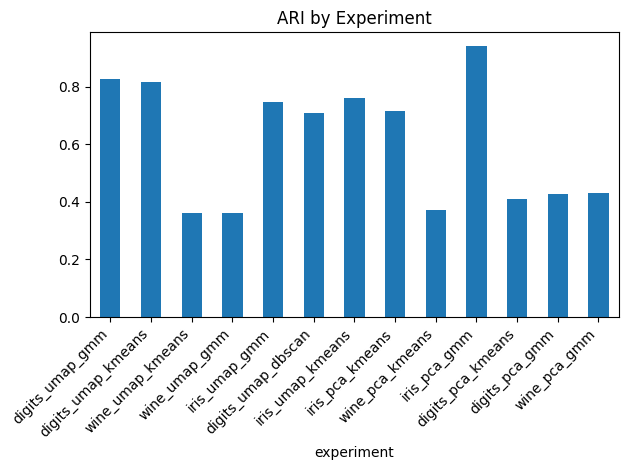

In [6]:
import matplotlib.pyplot as plt

# Bar chart: ARI by experiment (when available)
if 'ari' in df.columns:
    plt.figure()
    df.plot(kind='bar', x='experiment', y='ari', legend=False)
    plt.title('ARI by Experiment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

This notebook can be extended with more plots or comparisons (e.g., CH, DB).